In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataB.csv')
df.drop(df.columns[0], axis = 1, inplace=True)
df.loc[:, df.columns != 'gnd'] = StandardScaler().fit_transform(df.loc[:, df.columns != 'gnd'])
s = df.drop('gnd', axis=1).values

In [3]:
dfs = {
    'Kernal PCA': KernelPCA(n_components=2, kernel='rbf').fit_transform(s),
    'Isomap': Isomap(n_components=2).fit_transform(s),
    'Locally Linear Embedding': LocallyLinearEmbedding(n_components=2).fit_transform(s),
    'Laplacian Eigenmap': SpectralEmbedding(n_components=2).fit_transform(s),
    't-SNE': TSNE(n_components=2).fit_transform(s)
}

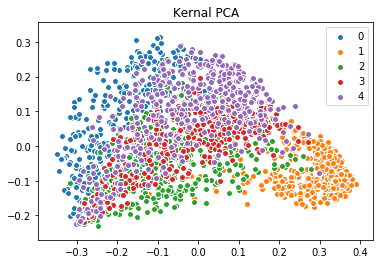

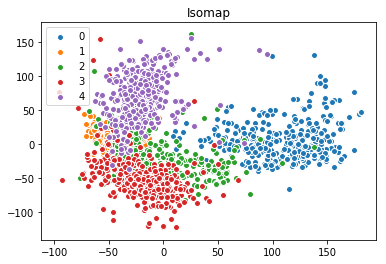

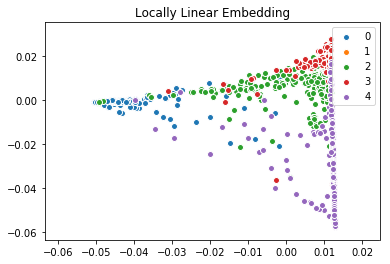

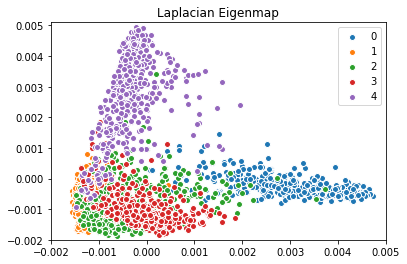

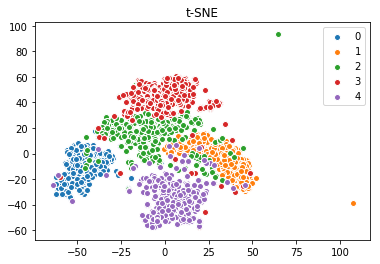

In [8]:
for k, v in dfs.items():
    vDf = pd.DataFrame(data = v, columns = [1, 2])
    vDf['gnd'] = df[['gnd']]
    fig, ax = plt.subplots()
    [ax.scatter(vDf.loc[vDf['gnd'] == i, 1], vDf.loc[vDf['gnd'] == i, 2], edgecolors='w') for i in [0, 1, 2, 3, 4]]
    ax.set_title(k)
    if k == 'Laplacian Eigenmap':
        ax.set_xlim(-0.002, 0.005)
        ax.set_ylim(-0.002, 0.0051)
    ax.legend([0, 1, 2, 3, 4])
    plt.show()